# Jupyter Notebook

## Como instalar sem sair do notebook

 É possilvel instalar pacotes no próprio notebook

- !pip3 install numpy

### Aceita linguagem de programação e markdown

In [7]:
def ola():
    print("Olá Mundo")

In [8]:
ola()

Olá Mundo


In [9]:
ola = "Olá mundo"
ola

'Olá mundo'

### Análise dados Enem 2019

In [79]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 529 kB/s eta 0:00:01


In [81]:
import seaborn as sns

#### Dados INEP https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [16]:
reader = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep=';',encoding='ISO-8859-1', chunksize=500, iterator=True)

In [17]:
dados = reader.get_chunk()

In [18]:
dados.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A
5,190001004632,2019,1500800,Ananindeua,15,PA,31,M,1,1,...,A,A,A,B,A,A,D,A,A,A
6,190001004633,2019,1504208,Marabá,15,PA,30,F,2,3,...,A,A,A,B,A,A,B,A,A,B
7,190001004634,2019,1501402,Belém,15,PA,26,F,0,3,...,A,A,A,B,A,A,B,A,A,A
8,190001004635,2019,1503606,Itaituba,15,PA,19,M,1,3,...,A,A,A,A,A,A,C,A,A,B
9,190001004636,2019,1507607,São Miguel do Guamá,15,PA,17,F,1,2,...,A,A,A,B,A,A,B,A,A,A


In [20]:
dados.shape

(500, 136)

In [22]:
dados.keys()

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [99]:
reader2 = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep=';',
                      chunksize=1000,
                     usecols=['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'NU_NOTA_MT'])

In [100]:
dadosAtualizados = reader2.get_chunk()

In [101]:
dadosAtualizados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_MT
0,190001004627,PA,21,M,1,3,369.1
1,190001004628,PA,16,F,1,3,416.5
2,190001004629,PA,18,F,1,1,571.5
3,190001004630,PA,23,M,0,3,NaN
4,190001004631,PA,23,M,1,3,NaN


In [102]:
dadosAtualizados.shape

(1000, 7)

In [108]:
dados2 = dadosAtualizados.groupby([
    'NU_INSCRICAO',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ESTADO_CIVIL'], as_index=False)['NU_NOTA_MT'].mean().dropna()

In [109]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001004627,PA,21,M,3,1,369.1
1,190001004628,PA,16,F,3,1,416.5
2,190001004629,PA,18,F,1,1,571.5
5,190001004632,PA,31,M,1,1,605.3
6,190001004633,PA,30,F,3,2,581.5


In [110]:
estado_civil = 'NãoInformado Solteiro(a) Casado(a) Separado(a) Viúvo(a)'.split(' ')
coluna = 'TP_ESTADO_CIVIL'

for i in range(4):
    alter = dados2[coluna] == i
    dados2.loc[alter, coluna] = estado_civil[i]

In [111]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001004627,PA,21,M,3,Solteiro(a),369.1
1,190001004628,PA,16,F,3,Solteiro(a),416.5
2,190001004629,PA,18,F,1,Solteiro(a),571.5
5,190001004632,PA,31,M,1,Solteiro(a),605.3
6,190001004633,PA,30,F,3,Casado(a),581.5


In [112]:
dados2['TP_COR_RACA'] = dados2['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

In [113]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001004627,PA,21,M,Parda,Solteiro(a),369.1
1,190001004628,PA,16,F,Parda,Solteiro(a),416.5
2,190001004629,PA,18,F,Branca,Solteiro(a),571.5
5,190001004632,PA,31,M,Branca,Solteiro(a),605.3
6,190001004633,PA,30,F,Parda,Casado(a),581.5


In [120]:
dadosSaved = dados2

### Exibindo dados no gráfico

In [114]:
#porcentagem de cada sexo na amostra
dados2['TP_SEXO'].value_counts()/dados2.shape[0]*100

F    65.21181
M    34.78819
Name: TP_SEXO, dtype: float64

In [116]:
dados2['TP_COR_RACA'].value_counts()/dados2.shape[0]*100

Parda       66.495507
Branca      16.431322
Preta       11.938383
Amarela      2.439024
NA           1.540436
Indígena     1.155327
Name: TP_COR_RACA, dtype: float64

* **countplot** Exibe as contagens de observações em cada categoria categórica usando barras.

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


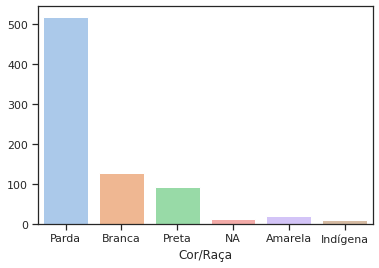

In [117]:
sns.countplot(dados2['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


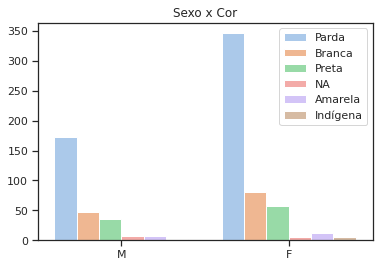

In [118]:
sns.countplot(dados2['TP_SEXO'],hue=dados2['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

* Seaborn distplot permite mostrar um histograma com uma linha

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

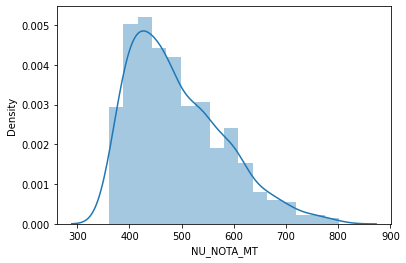

In [82]:
sns.distplot(dados2['NU_NOTA_MT'])

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

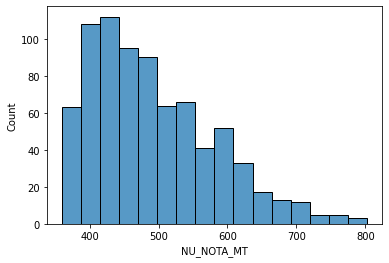

In [83]:
sns.histplot(dados2['NU_NOTA_MT'])

### Relação Idade x Nota_matematica

* **jointplot** exibe uma relação entre 2 variáveis ​​(bivariada), bem como perfis 1D (univariada) nas margens

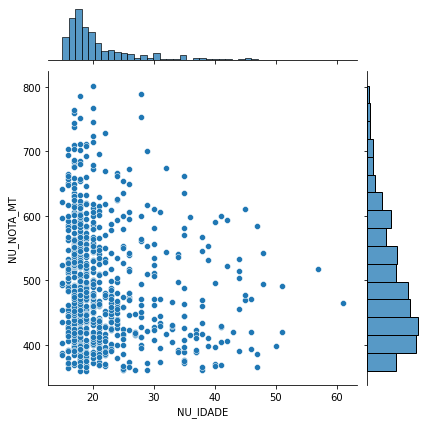

In [86]:
sns.jointplot(data=dados2, x='NU_IDADE', y='NU_NOTA_MT')

### Relação Idade x Nota_matematica - relacionada com estado civil

* **lmplot()** é um gráfico de dispersão 2D com uma linha de regressão sobreposta opcional 

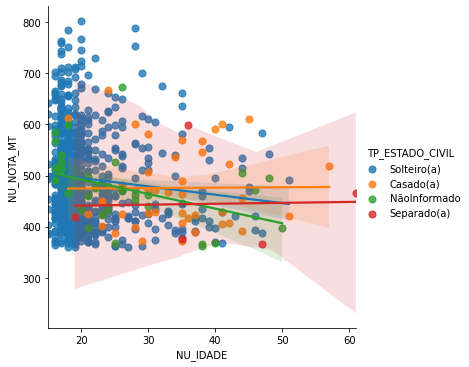

In [90]:
sns.lmplot(data=dados2, x='NU_IDADE', y='NU_NOTA_MT', hue='TP_ESTADO_CIVIL', scatter_kws={'s': 50})

* **describe()** visualizar alguns detalhes estatísticos básicos como percentil, média, padrão

In [130]:
dadosSaved.describe()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_MT
count,7.790000e+02,779.000000,779.000000
mean,1.900010e+11,21.982028,491.517073
std,2.874790e+02,7.180177,89.555733
min,1.900010e+11,15.000000,360.400000
25%,1.900010e+11,18.000000,420.100000
50%,1.900010e+11,19.000000,472.500000
75%,1.900010e+11,23.000000,548.600000
max,1.900010e+11,61.000000,801.900000


* **hist()** Um histograma é uma representação da distribuição de dados. 

<AxesSubplot:>

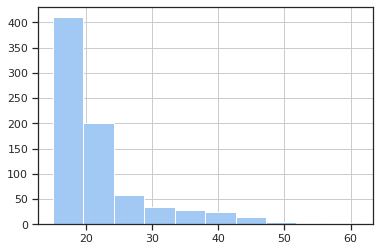

In [123]:
dadosSaved['NU_IDADE'].hist()

<AxesSubplot:>

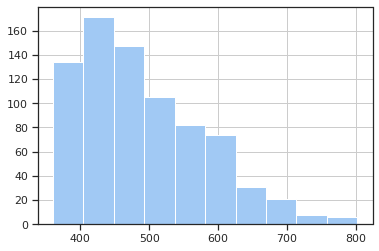

In [124]:
dadosSaved['NU_NOTA_MT'].hist()

* **skew()** calcular a simetria dos dados

In [125]:
dadosSaved.skew()

NU_INSCRICAO    0.005502
NU_IDADE        2.063272
NU_NOTA_MT      0.819279
dtype: float64

* **corr()** calcular a correlação entre todas as colunas do dataset.

In [126]:
dadosSaved.corr()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_MT
NU_INSCRICAO,1.000000,0.067155,0.027770
NU_IDADE,0.067155,1.000000,-0.128954
NU_NOTA_MT,0.027770,-0.128954,1.000000


* método **std()** calcula o desvio padrão da coluna.

In [127]:
dadosSaved.std()

NU_INSCRICAO    287.478963
NU_IDADE          7.180177
NU_NOTA_MT       89.555733
dtype: float64